In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

df=pd.read_csv("IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [2]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [3]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [5]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop(columns=['species'])
y = df['species']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<Axes: >

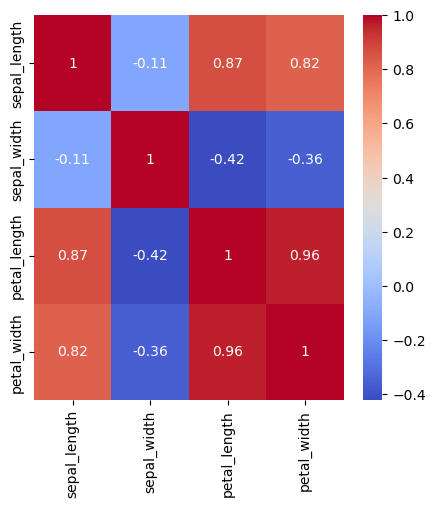

In [7]:
numeric_columns=df.drop(columns='species')
corr=numeric_columns.corr()
fig,axis=plt.subplots(figsize=(5,5))
sns.heatmap(corr,annot=True,ax=axis,cmap='coolwarm')

In [8]:
# Model 1

LR=LogisticRegression()
LR.fit(X_train,y_train)
LR_accuracy=LR.score(X_test,y_test)*100
LR_accuracy

100.0

In [9]:
# Model 2

DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)
DT_accuracy=DT.score(X_test,y_test)*100
DT_accuracy

100.0

In [11]:
# Model 3

from sklearn.ensemble import RandomForestClassifier

# Initialize the model
RFC = RandomForestClassifier(random_state=42)

# Train the model
RFC.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions
y_pred = RFC.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)


accuracy



1.0

In [12]:
# The above Models shows a clear case of overfitting

In [13]:
# Lets try to use a modfied selection of features

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# Model 1

LR=LogisticRegression()
LR.fit(X_train,y_train)
LR_accuracy=LR.score(X_test,y_test)*100
LR_accuracy

100.0

In [15]:
# Model 2

DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)
DT_accuracy=DT.score(X_test,y_test)*100
DT_accuracy

100.0

In [19]:
# Model 3

from sklearn.ensemble import RandomForestClassifier

# Initialize the model
RFC = RandomForestClassifier(random_state=42)

# Train the model
RFC.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions
y_pred = RFC.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')



Accuracy: 100.00%


In [18]:
# Model 4

from sklearn.linear_model import LogisticRegression

# Create and train the model
model = LogisticRegression(multi_class='ovr')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')



Accuracy: 95.56%


In [20]:
# Out of all the scenarios LogisticRegression based classification model works better avoiding overfitting unlike other models above